In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "2c-data"

# **Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability 'p' of a binary dependent variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in problems of binary classification

**Exploring the Factors Influencing Electric Vehicle Adoption**

In recent years, the push towards sustainable living and reducing carbon footprints has intensified globally. Among the many initiatives aimed at achieving this, the adoption of electric vehicles (EVs) stands out as a critical measure.Car manufacturers have all been actively promoting the transition from traditional gasoline-powered vehicles to electric ones.

To better understand the dynamics of this transition, a comprehensive study was conducted to explore the factors influencing individuals' decisions to adopt electric vehicles.The dataset aims to provide valuable insights into the key predictors that drive or hinder the adoption of EVs.

**Data Dictionary:** <br>
ID: A unique identifier assigned to each individual in the study

Gender: The gender of the individual, categorized as Male or Female.

Age: The age of the individual in years

Annual Income: The annual income of the individual

Electric Vehicle Adoption: A categorical variable indicating whether the individual owns an electric vehicle (0/1). This is the target variable of the study, helping to identify the proportion of adopters and non-adopters.

In [3]:
df <- read.csv("/kaggle/input/2c-data/2c-data.csv")
head(df)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


**1)** Fit a logistic regression model to classify the target variable(Electric Vehicle Adoption)<br>
Hint: Use glm()        (3 marks)
​

In [4]:
##Convert categorical variables (Gender)

##Build model
# Convert categorical variable 'Gender' to a factor .Basically mapping the values to distinct vals
df$Gender <- factor(df$Gender)

# Fitting  the logistic regression model
logistic_model <- glm(Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income,
                      data = df,
                      family = binomial)

# Summary to find out the nature and significance
summary(logistic_model)

# Predict the probability of Electric Vehicle Adoption for each individual
predicted_probabilities <- predict(logistic_model, type = "response")

# Convert probabilities to binary outcomes (0 or 1) using a threshold of 0.5 since logistic regression has bell curve shaped graph(for scaling)
predicted_class <- ifelse(predicted_probabilities > 0.5, 1, 0)

# Evaluate model accuracy by comparing predictions to actual values
accuracy <- mean(predicted_class == df$Electric_Vehicle_Adoption)
print(paste("Model Accuracy:", accuracy))

# Confusion matrix to assess performance
table(Predicted = predicted_class, Actual = df$Electric_Vehicle_Adoption)


Call:
glm(formula = Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
    family = binomial, data = df)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.278e+01  1.359e+00  -9.405  < 2e-16 ***
GenderMale     3.338e-01  3.052e-01   1.094    0.274    
Age            2.370e-01  2.638e-02   8.984  < 2e-16 ***
Annual_Income  3.644e-05  5.473e-06   6.659 2.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 521.57  on 399  degrees of freedom
Residual deviance: 275.84  on 396  degrees of freedom
AIC: 283.84

Number of Fisher Scoring iterations: 6


[1] "Model Accuracy: 0.8525"


         Actual
Predicted   0   1
        0 237  39
        1  20 104

**2)** What can u interpret from the summary of the model?         (2 marks)

According to the output, model accuracy is 0.85 or 85% which is a fairly decent model. Confusion matrix shows that majority of the datapoints being correctly classified (237 tp and 104 tn). Based on p values age and income tend to be more statistically significant over gender. Comparing the null and residual deviance we see residual deviance less than null implying model is better fit and the model can explain the variations better.

**3)** Plot the ROC curve and find the AUC value            (3 marks)

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC Value: 0.927389730891676"


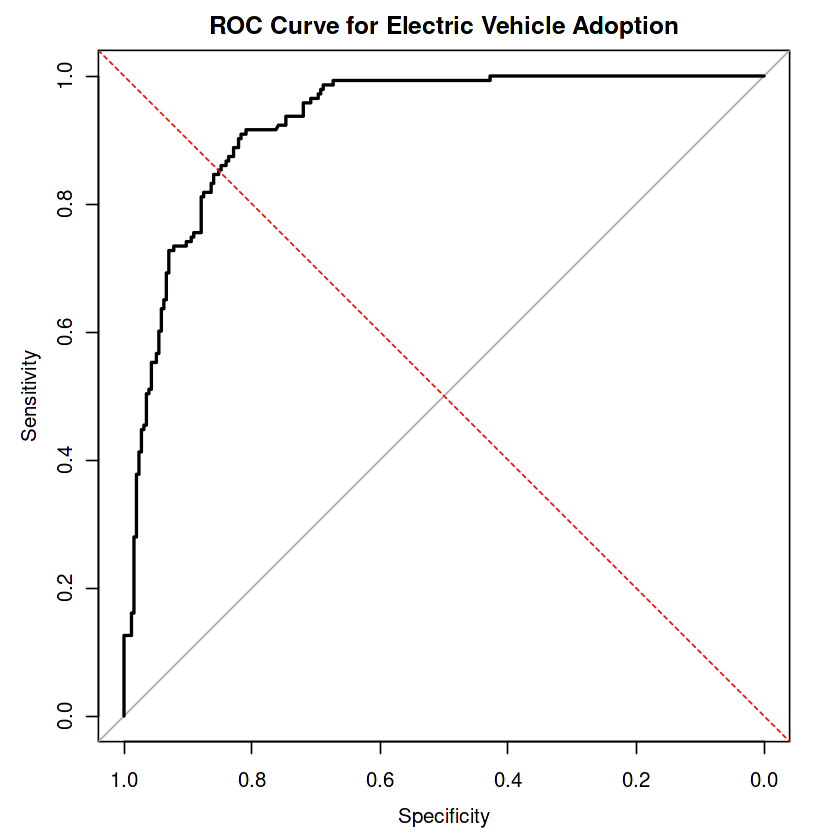

In [5]:
if (!require(pROC)) {
  install.packages("pROC")
}
library(pROC)

# Create an ROC curve object
roc_curve <- roc(df$Electric_Vehicle_Adoption, predicted_probabilities)

# Plot the ROC curve
plot(roc_curve, col = "black", lwd = 2, main = "ROC Curve for Electric Vehicle Adoption")

# Add diagonal line (random classifier line)
abline(a = 0, b = 1, col = "red", lty = 2)

# Calculate AUC (Area Under the Curve)
auc_value <- auc(roc_curve)
print(paste("AUC Value:", auc_value))

**4)** What can you interpret from the ROC curve and AUC value?    (2 marks)

AUC value of 0.927 means that 92.7% of the time the  model can correctly distinguish between a randomly chosen individual who has adopted an electric vehicle and one who has not. The ROC curve also states that the model is really good and able to classify majority of the cases correctly.